## 단어임베딩 : 단어를 단순 인덱싱하는것이 아니라 의미있는 숫자들의 집합으로 벡터화하는 기법
#### - 각 단어를 50~300차원으로 구성된 벡터로 표현
#### - 각 단어들 사이의 거리를 계산이 가능하여 방향성, 유의어, 반대어 등을 찾을수 있음
#### - 말뭉치를 계속 학습하여 스스로 임베딩벡터가 만들어짐 - 초기는 랜덤하게 주고 말뭉치를 계속 입력받아 학습하여 고차원의 벡터를 생성
#### - glove : 스탠포드대에서 이미 만들어진 단어 벡터로 40만개 단어를 100차원 임베딩해 놓음
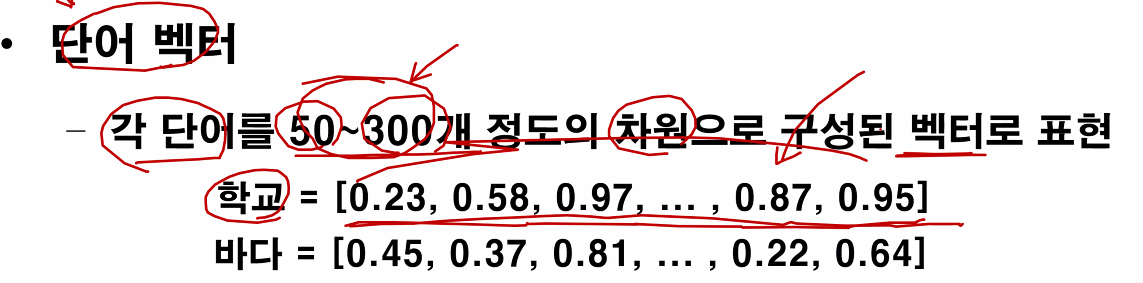
#### -  단어의 의미를 다차원 공간에 벡터화하는 방법을 분산 표현(distributed representation) : 비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다 
### 참고사이트 word2vec.kr, https://wikidocs.net/22660
---
#### - 단어마다 임의의 고유번호 배정 : 원핫인코딩, BOW, TF-IDF -> 아무런 의미가 들어 있지 않음

In [3]:
from konlpy.tag import Twitter, Okt, Kkma
from gensim.models.word2vec import Word2Vec

In [4]:
kkma = Kkma()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import korean_language

In [6]:
news = pd.read_excel('./news2018.xlsx')

C:\python\ml308\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
news['본문'][:4]

0    - 비핵화 수준 상응 조치 놓고\n- 양국 협상팀 막판까지 ‘밀당’\n- 1차 때와...
1    김정은 국무위원장이 27일 시작되는 제2차 북미정상회담 성공을 위해 심혈을 기울이고...
2    북미가 처음으로 정상 간 단독회담과 만찬을 가지며 또다시 새로운 역사 창조에 나섰다...
3    지난해 9월 남북정상회담 당시 리선권 북한 조국평화통일위원장의 '냉면' 발언으로 정...
Name: 본문, dtype: object

In [8]:
sentense_list = []

for sent in news['본문']:
    sent_kkma_pos = kkma.nouns(sent) # 문장에서 명사만 추출
    word_list = []
    for word_pos in sent_kkma_pos:
        word_list.append(word_pos) # 명사 저장
    
    sentense_list.append(word_list) # 문장별 명사 저장

In [9]:
sentense_list[:3]

[['비핵화',
  '수준',
  '상응',
  '조치',
  '양국',
  '협상',
  '협상팀',
  '팀',
  '막판',
  '당',
  '1',
  '1차',
  '차',
  '때',
  '시간',
  '조율',
  '단계적',
  '접근',
  '동의',
  '예상',
  '종전',
  '종전선언',
  '선언',
  '연락',
  '연락사무소',
  '사무소',
  '개설',
  '등',
  '조건',
  '조건부',
  '부',
  '제재',
  '완화',
  '명시',
  '가능성',
  '북미',
  '북미회담',
  '회담',
  '빅딜',
  '성공',
  '김',
  '김정은',
  '정은',
  '답방',
  '결과',
  '연관',
  '북한',
  '국무',
  '국무위원장',
  '위원장',
  '도',
  '도널드',
  '널드',
  '트럼프',
  '미국',
  '대통령',
  '27',
  '27일',
  '일',
  '친교',
  '만찬'],
 ['김',
  '김정은',
  '정은',
  '국무',
  '국무위원장',
  '위원장',
  '27',
  '27일',
  '일',
  '시작',
  '저',
  '2',
  '2차',
  '차',
  '북미',
  '북미정상회담',
  '정상',
  '회담',
  '성공',
  '심혈',
  '조선',
  '조선중앙통신',
  '중앙',
  '통신',
  '이날',
  '26',
  '26일',
  '하노이',
  '도착',
  '리',
  '호텔',
  '실무',
  '실무대표단',
  '대표단',
  '보고',
  '조미',
  '수뇌',
  '수뇌회담',
  '성공적',
  '보장',
  '나라',
  '현지',
  '파견',
  '사이',
  '접촉',
  '정형',
  '결과',
  '을',
  '구체적',
  '청취'],
 ['북미',
  '처음',
  '정상',
  '간',
  '단독',
  '단독회담',
  '회담',
  '만찬',
  '역사',
  '창조',


### Word2Vec : 토큰화된 단어를 입력해주면 차원을 지정하면 학습한 단어임베딩 결과가 나옴

In [10]:
model = Word2Vec(sentense_list, vector_size=100)

In [11]:
model.wv.most_similar('한국')

[('자유', 0.9977095723152161),
 ('자유한국', 0.9938434958457947),
 ('당', 0.989422082901001),
 ('자유한국당', 0.9848154783248901),
 ('민주당', 0.983786940574646),
 ('자유한국당의', 0.9780279397964478),
 ('대표', 0.9735166430473328),
 ('원내대표', 0.971446692943573),
 ('5당', 0.9706395268440247),
 ('찬', 0.9675488471984863)]

In [14]:
model.wv.similarity('트럼프','미국')

0.9911119

In [16]:
model.wv.similarity('한국','미국')

0.31101346

In [13]:
model.wv.vocab

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

### Topic Modeling : LDA
#### - 문서를 지정한 개수만큼의 주제(카테고리)를 구분하는 것 - 비지도학습에 해당
#### - 관련된 단어나 문서의 집합을 찾는 방법이 필요한데 잠재 디리클레 할당(LDA)을 주로 사용
#### - 한 문서에는 여러 토픽이 복합적으로 존재할수 있고 해당문서의 각각의 토픽 비중이 다를수 있음